### Import benchmark functions

In [2]:
from benchmark.benchmarkFunctions import *
from alg.BayesianOptimization import bayesian_optimization
from alg.LatinHypercubeSampling import latin_hypercube
from alg.ParticleSwarmOptimization import particle_swarm
from alg.SobolSampling import sobol
from alg.ResponseSurfaceModeling import response_surface
from alg.BFGS import bfgs
from alg.NelderMead import nelder_mead
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D


# Definition of variables
benchmarkfunction_list = [StybliskiTang, Rastrigin, Rosenbrock, Beale, Sphere, Perm, GoldsteinPrice, Ackley, Bohachevsky] #Hartmann
algorithms_list        = [particle_swarm, bayesian_optimization]

### Benchmark functions

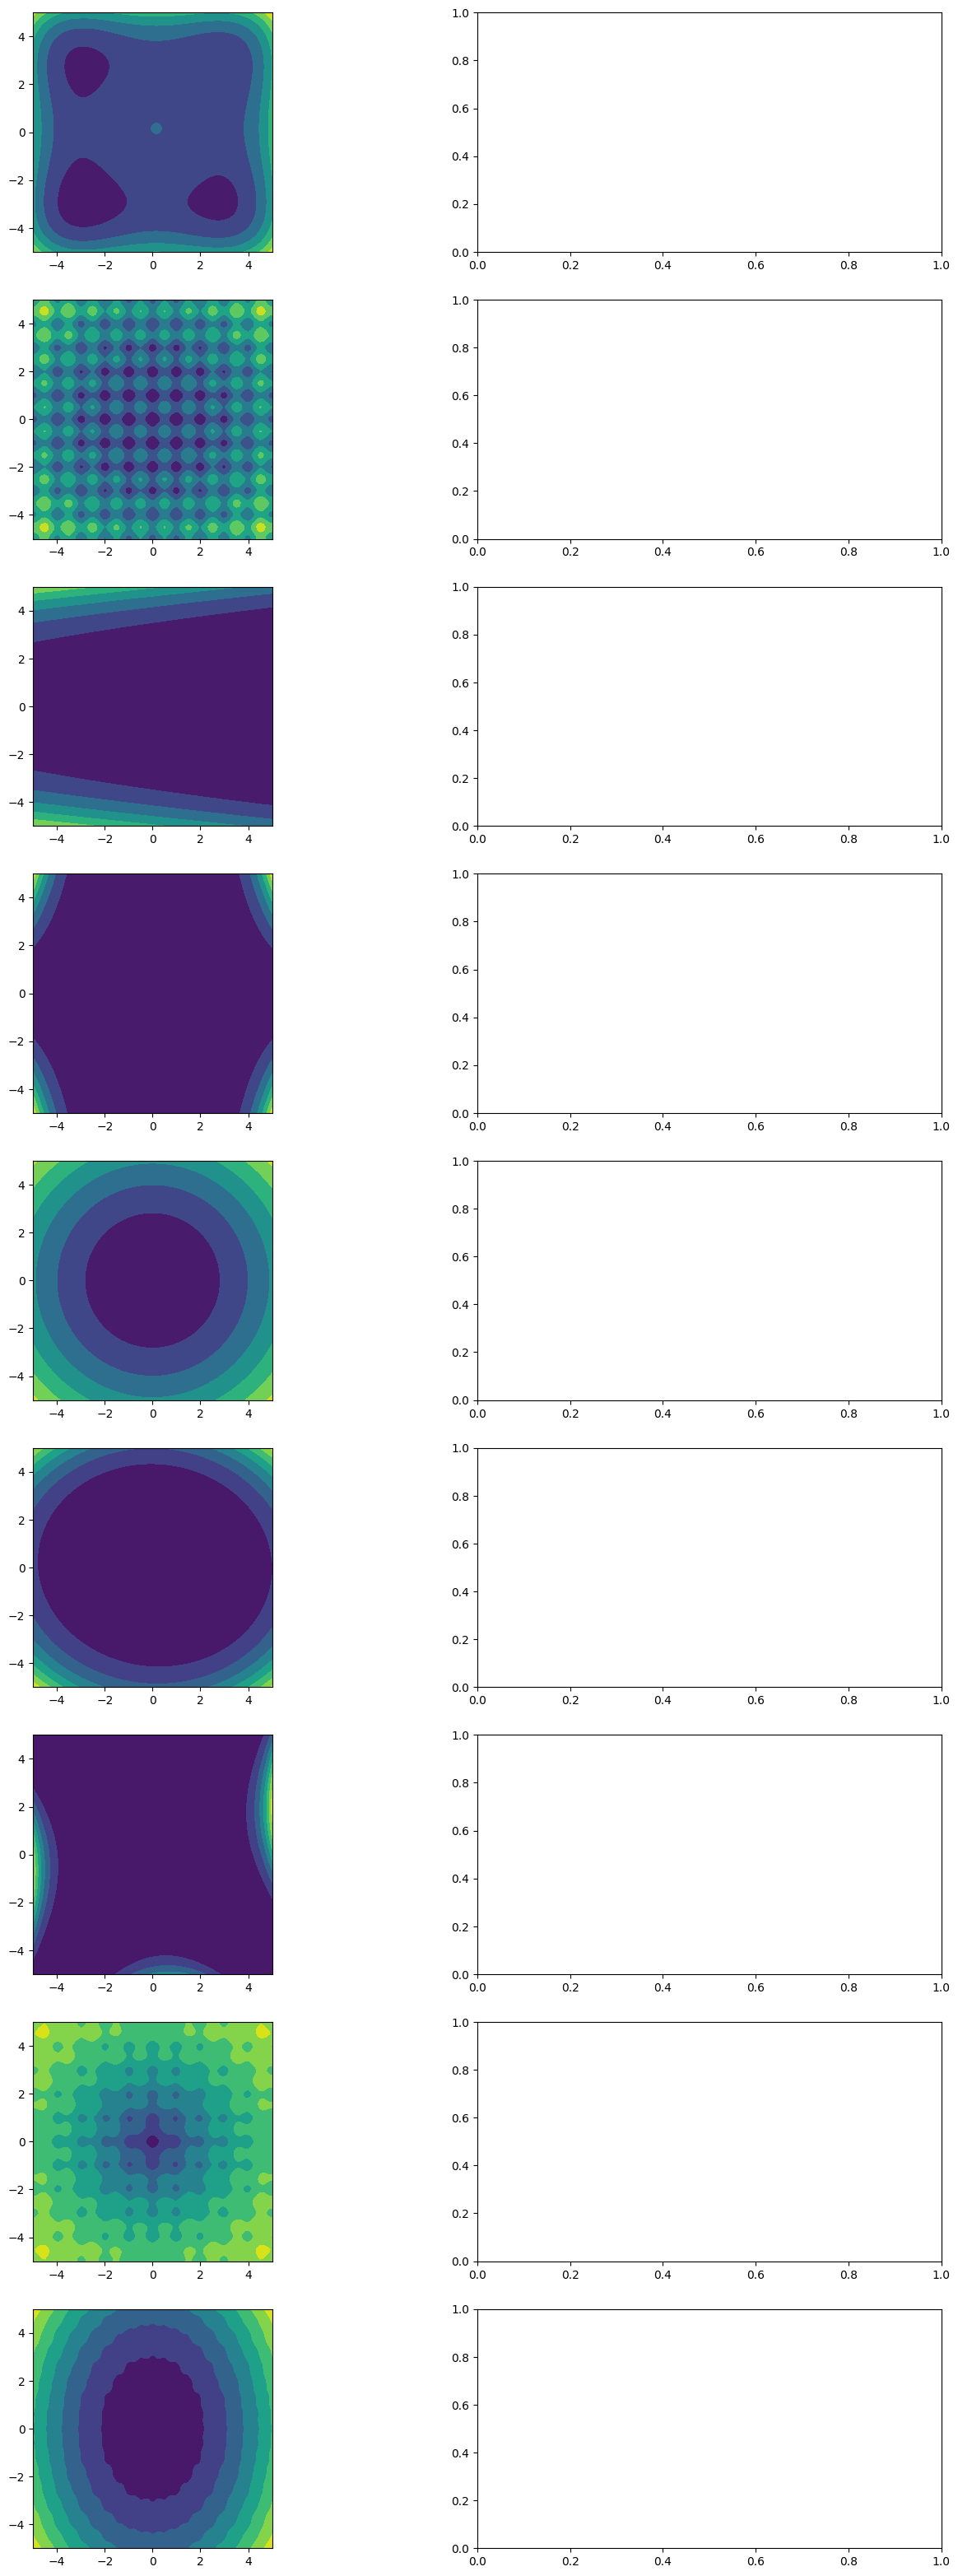

In [2]:
# Define the X1 and X2 span
X1 = np.linspace(-5, 5, 101)
X2 = np.linspace(-5, 5, 101)
points = np.array([[x1,x2] for x1 in X1 for x2 in X2]).T

fig, ax = plt.subplots(len(benchmarkfunction_list), 2, figsize=(16,40))

for idx, fun in enumerate(benchmarkfunction_list):
    # Compute the function
    Fx = fun(points).reshape(101,101)

    ax[idx,0].contourf(X1,X2,Fx)
    ax[idx,0].axis('scaled')

plt.show()


### Bayesian Optimization algorithm

[MIN function] Minimum in x=-2.9,    y=-2.9    with f=-78.3319
[OPTIMIZATION] Minimum in x=-2.8919355092328436, y=2.572380425161988 with f=-78.31590678910413


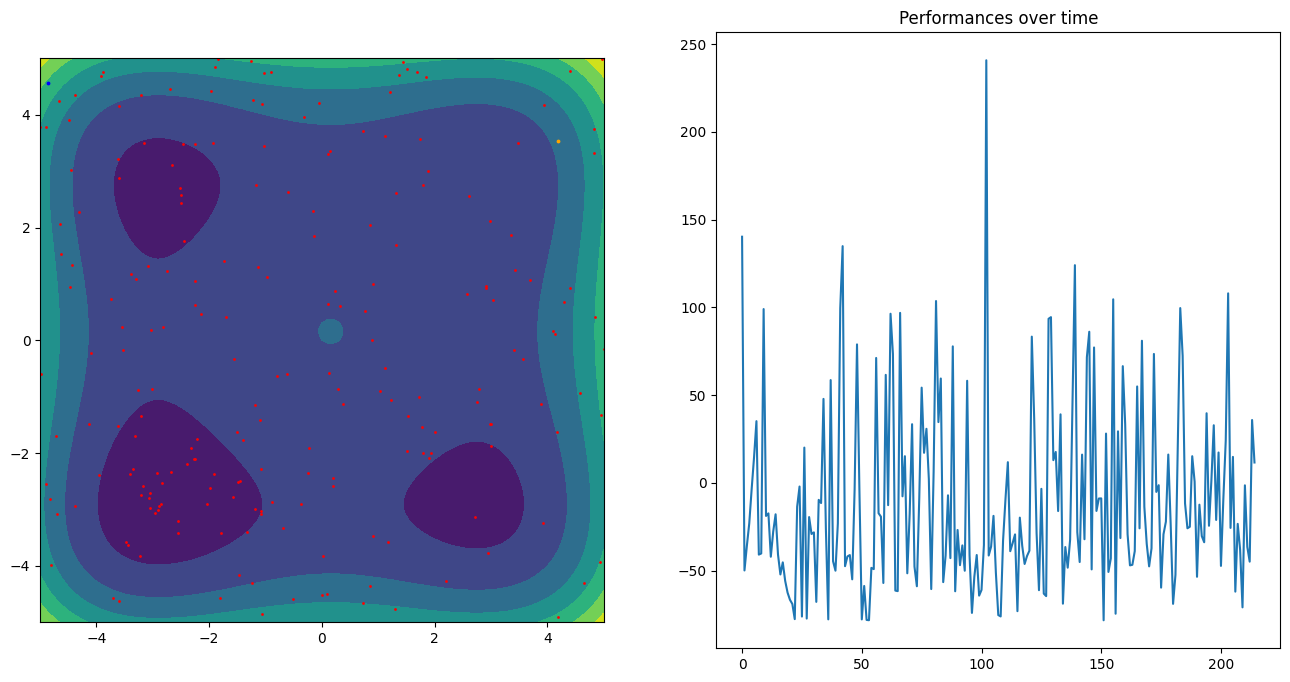

In [3]:
# Define the X and Y span
X1 = np.linspace(-5, 5, 101)
X2 = np.linspace(-5, 5, 101)
points = np.array([[x1,x2] for x1 in X1 for x2 in X2])

# Compute the function
Fx = StybliskiTang(points.T)

# Find minimum and its coordinates
idx  = np.argmin(Fx)
Xmin = points[idx]

# Set the bounds
bounds = {'X' : (-5,5), 'Y' : (-5,5)}
# Run the optimization algorithm
X_alg, Y_alg = bayesian_optimization(StybliskiTang, dimension=2, n_samples=15, max_iter=200, low=-5, high=5)

print(f"[MIN function] Minimum in x={Xmin[0]},    y={Xmin[1]}    with f={Fx[idx]}")
print(f"[OPTIMIZATION] Minimum in x={X_alg[np.argmin(Y_alg),0]}, y={X_alg[-np.argmin(Y_alg),1]} with f={np.min(Y_alg)}")



fig, ax = plt.subplots(1, 2, figsize=(16,8))

Fx = Fx.reshape(101,101)
ax[0].contourf(X1,X2,Fx)
ax[0].axis('scaled')
ax[0].scatter(X_alg[:,0], X_alg[:,1], c="red", s=1)
ax[0].scatter(X_alg[0,0], X_alg[0,1], c="blue",s=3)
ax[0].scatter(X_alg[-1,0],X_alg[-1,1],c="orange",s=3)
ax[1].plot(np.arange(0,len(Y_alg)), Y_alg)
ax[1].set_title("Performances over time")

plt.show()

### Particle Swarm Optimization (PSO) algorithm

[MIN function] Minimum in x=-2.9,    y=-2.9    with f=-78.3319
[OPTIMIZATION] Minimum in x=-2.903534024093308, y=-2.9035340300157535 with f=-78.33233140754285


Text(0.5, 1.0, 'Performances over time')

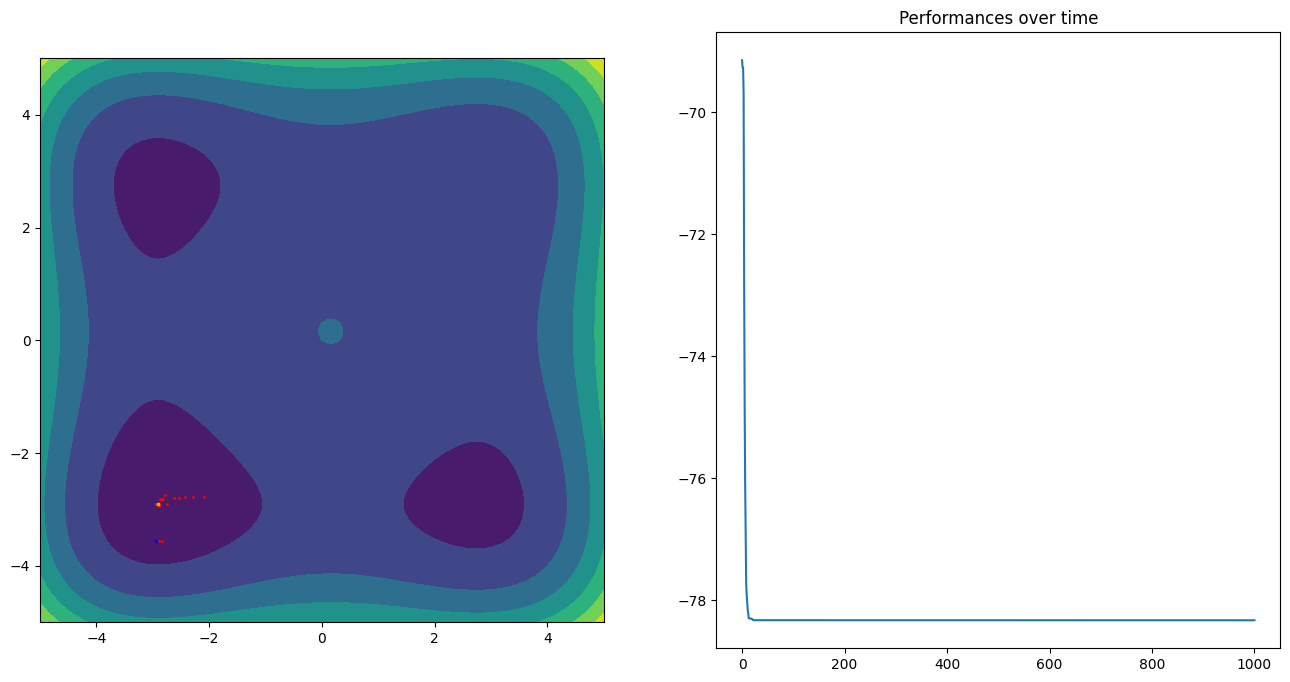

In [4]:
# Define the X1 and X2 span
X1 = np.linspace(-5, 5, 101)
X2 = np.linspace(-5, 5, 101)
points = np.array([[x1,x2] for x1 in X1 for x2 in X2])

# Compute the function
Fx = StybliskiTang(points.T)

# Find minimum and its coordinates
idx  = np.argmin(Fx)
Xmin = points[idx]

# Run the optimization algorithm
Xalg, Yalg = particle_swarm(StybliskiTang, low=-5, high=5)

print(f"[MIN function] Minimum in x={Xmin[0]},    y={Xmin[1]}    with f={Fx[idx]}")
print(f"[OPTIMIZATION] Minimum in x={Xalg[-1,0]}, y={Xalg[-1,1]} with f={Yalg[-1]}")

fig, ax = plt.subplots(1, 2, figsize=(16,8))

Fx = Fx.reshape(101,101)
ax[0].contourf(X1,X2,Fx)
ax[0].axis('scaled')
ax[0].scatter(Xalg[:,0], Xalg[:,1], c="red", s=1)
ax[0].scatter(Xalg[0,0], Xalg[0,1], c="blue",s=3)
ax[0].scatter(Xalg[-1,0],Xalg[-1,1],c="orange",s=3)
ax[1].plot(np.arange(0,len(Yalg)), Yalg)
ax[1].set_title("Performances over time")
plt.show()


### Nelder Mead algorithm

[MIN function] Minimum in x=-2.9,    y=-2.9    with f=-78.3319
[OPTIMIZATION] Minimum in x=-2.9034404560978975, y=-2.903410382480253 with f=-78.33233099180421


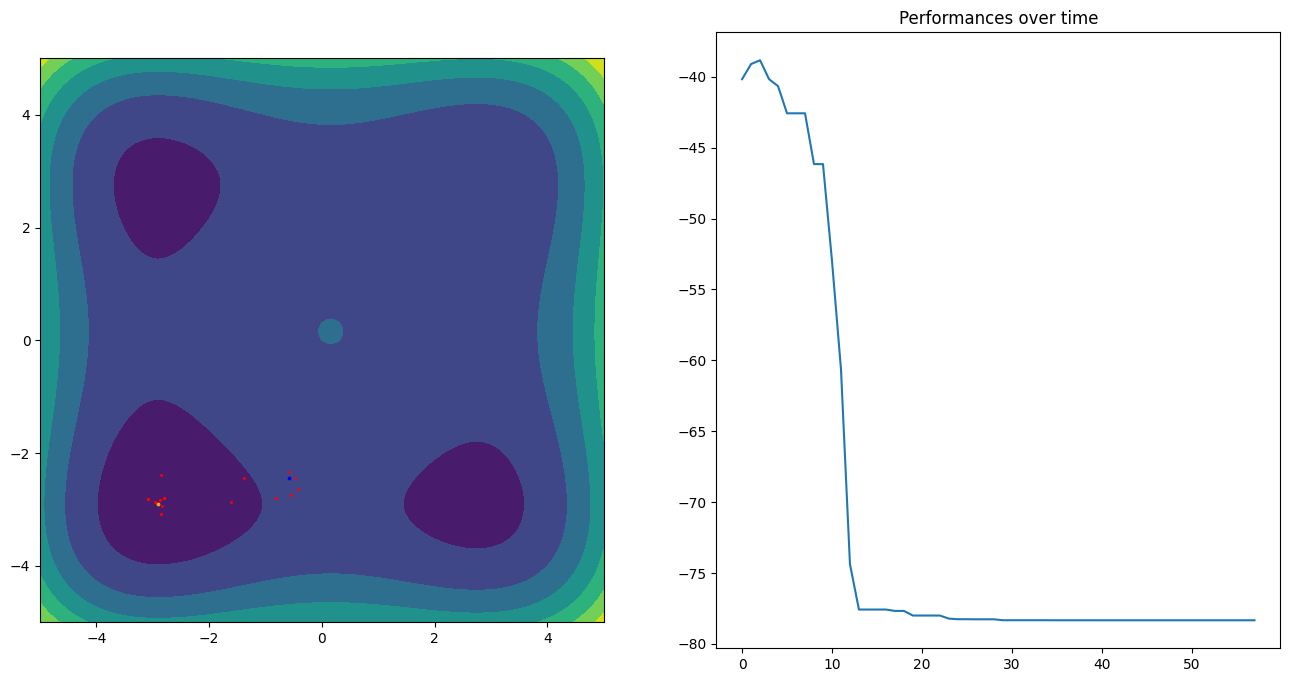

In [3]:
# Define the X1 and X2 span
X1 = np.linspace(-5, 5, 101)
X2 = np.linspace(-5, 5, 101)
points = np.array([[x1,x2] for x1 in X1 for x2 in X2])

# Compute the function
Fx = StybliskiTang(points.T)

# Find minimum and its coordinates
idx  = np.argmin(Fx)
Xmin = points[idx]

# Run the optimization algorithm
Xalg, Yalg = nelder_mead(StybliskiTang, low=-5,high=5, max_iter=100)

print(f"[MIN function] Minimum in x={Xmin[0]},    y={Xmin[1]}    with f={Fx[idx]}")
print(f"[OPTIMIZATION] Minimum in x={Xalg[-1,0]}, y={Xalg[-1,1]} with f={Yalg[-1]}")

fig, ax = plt.subplots(1, 2, figsize=(16,8))

Fx = Fx.reshape(101,101)
ax[0].contourf(X1,X2,Fx)
ax[0].axis('scaled')
ax[0].scatter(Xalg[:,0], Xalg[:,1], c="red", s=1)
ax[0].scatter(Xalg[0,0], Xalg[0,1], c="blue",s=3)
ax[0].scatter(Xalg[-1,0],Xalg[-1,1],c="orange",s=3)
ax[1].plot(np.arange(0,len(Yalg)), Yalg)
ax[1].set_title("Performances over time")
plt.show()

### Response Surface Modeling 

In [ ]:
# Define the X1 and X2 span
X1 = np.linspace(-5, 5, 101)
X2 = np.linspace(-5, 5, 101)
points = np.array([[x1,x2] for x1 in X1 for x2 in X2])

# Compute the function
Fx = StybliskiTang(points.T)

# Find minimum and its coordinates
idx  = np.argmin(Fx)
Xmin = points[idx]

# Run the optimization algorithm
x0 = np.random.uniform(-5,5,size=[2,1])
Xalg, Yalg = response_surface(StybliskiTang, X_new=x0, iterations=100, sampling_bound=[2.5,0.6], sampling_method="central_composite")

print(f"[MIN function] Minimum in x={Xmin[0]},    y={Xmin[1]}    with f={Fx[idx]}")
print(f"[OPTIMIZATION] Minimum in x={Xalg[-1,0]}, y={Xalg[-1,1]} with f={Yalg[-1]}")

fig, ax = plt.subplots(1, 2, figsize=(16,8))

Fx = Fx.reshape(101,101)
ax[0].contourf(X1,X2,Fx)
ax[0].axis('scaled')
ax[0].scatter(Xalg[:,0], Xalg[:,1], c="red", s=1)
ax[0].scatter(Xalg[0,0], Xalg[0,1], c="blue",s=3)
ax[0].scatter(Xalg[-1,0],Xalg[-1,1],c="orange",s=3)
ax[1].plot(np.arange(0,len(Yalg)), Yalg)
ax[1].set_title("Performances over time")

plt.show()

### Broyden–Fletcher–Goldfarb–Shanno optimization algorithm

In [ ]:
# Define the X1 and X2 span
X1 = np.linspace(-5, 5, 101)
X2 = np.linspace(-5, 5, 101)
points = np.array([[x1,x2] for x1 in X1 for x2 in X2])

# Compute the function
Fx = StybliskiTang(points.T)

# Find minimum and its coordinates
idx  = np.argmin(Fx)
Xmin = points[idx]

# Run the optimization algorithm
x0 = np.random.uniform(-5,5,size=[2,1])
x1 = np.random.uniform(-5,5,size=[2,1])
Xalg, Yalg = bfgs(StybliskiTang, x0, x1)

print(f"[MIN function] Minimum in x={Xmin[0]},    y={Xmin[1]}    with f={Fx[idx]}")
print(f"[OPTIMIZATION] Minimum in x={Xalg[-1,0]}, y={Xalg[-1,1]} with f={Yalg[-1]}")

fig, ax = plt.subplots(1, 2, figsize=(16,8))

Fx = Fx.reshape(101,101)
ax[0].contourf(X1,X2,Fx)
ax[0].axis('scaled')
ax[0].scatter(Xalg[:,0], Xalg[:,1], c="red", s=1)
ax[0].scatter(Xalg[0,0], Xalg[0,1], c="blue",s=3)
ax[0].scatter(Xalg[-1,0],Xalg[-1,1],c="orange",s=3)
ax[1].plot(np.arange(0,len(Yalg)), Yalg)
ax[1].set_title("Performances over time")

plt.show()

### Sobol Sampling

In [ ]:
samples = sobol(50, 2, [-5, -5], [5, 5])

fig = plt.figure(figsize=[8,8])
ax = fig.add_subplot(1, 1, 1)
ax.scatter(samples[:,0], samples[:,1])


### Latin Hypercube Sampling

In [ ]:
samples = latin_hypercube(50, 2, [-5, -5], [5, 5])

fig = plt.figure(figsize=[8,8])
ax = fig.add_subplot(1, 1, 1)
ax.scatter(samples[:,0], samples[:,1])


### Comparison of sampling distribution

In [ ]:
samples_lh = latin_hypercube(50, 2, [-5, -5], [5, 5])
samples_sobol = sobol(50, 2, [-5, -5], [5, 5])

fig = plt.figure(figsize=[8,8])
ax = fig.add_subplot(1, 1, 1)
ax.scatter(samples_lh[:,0], samples_lh[:,1],c="blue")
ax.scatter(samples_sobol[:,0], samples_sobol[:,1],c="red")

### Algorithms performances

In [ ]:
'''
for alg in algorithms_list:

    score = []

    # Run the optimization algorithms and store the best value after 50 iterations
    for fun in benchmarkfunction_list:
        score.append(alg(fun), max_iter=50)

    # Plot the result to compare performances
'''